# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: gorontalo, City ID: 1643837
City Name: bredasdorp, City ID: 1015776
City Name: lebu, City ID: 3883457
City Name: kieta, City ID: 2094027
City Name: upernavik, City ID: 3418910
City Name: souillac, City ID: 933995
City Name: port alfred, City ID: 964432
City Name: ranfurly, City ID: 2183774
That record does not exist, searching for next record...
City Name: rikitea, City ID: 4030556
City Name: ushuaia, City ID: 3833367
City Name: cidreira, City ID: 3466165
City Name: bayanday, City ID: 2027004
City Name: padang, City ID: 1633419
City Name: kaarina, City ID: 655130
City Name: mataura, City ID: 6201424
That record does not exist, searching for next record...
City Name: gigmoto, City ID: 1712961
City Name: shirokiy, City ID: 2016680
City Name: nikolskoye, City ID: 546105
City Name: mar del plata, City ID: 3430863
City Name: omboue, City ID: 2396853
City Name: bluff, City ID: 2206939
City Name: jamestown, City ID: 5122534
That record does not exist, searching for next record...
C

City Name: avera, City ID: 4231997
City Name: nanortalik, City ID: 3421765
City Name: meadow lake, City ID: 5478673
City Name: bristol, City ID: 4931378
City Name: linhares, City ID: 3458498
City Name: dingle, City ID: 1714733
City Name: boulder, City ID: 5574999
City Name: pyay, City ID: 1299154
City Name: turayf, City ID: 101312
That record does not exist, searching for next record...
City Name: asyut, City ID: 359783
City Name: porto murtinho, City ID: 3452712
City Name: charters towers, City ID: 2171722
City Name: harindanga, City ID: 1349090
City Name: shangrao, City ID: 1787858
City Name: vilyuysk, City ID: 2013392
City Name: tiksi, City ID: 2015306
City Name: kristiansund, City ID: 6453331
City Name: chateaudun, City ID: 3026285
That record does not exist, searching for next record...
City Name: nome, City ID: 5870133
City Name: ballesteros, City ID: 1727962
That record does not exist, searching for next record...
City Name: kamenka, City ID: 553766
City Name: sao filipe, City I

City Name: marhaura, City ID: 1263528
City Name: vestmannaeyjar, City ID: 3412093
City Name: beverly hills, City ID: 5328041
City Name: aranos, City ID: 3358666
City Name: tayoltita, City ID: 3982292
That record does not exist, searching for next record...
City Name: rafaela, City ID: 3839479
City Name: calatagan, City ID: 1720503
City Name: las palmas, City ID: 2515271
City Name: damara, City ID: 2387435
City Name: port macquarie, City ID: 2152659
City Name: santa maria del oro, City ID: 3984078
City Name: karasuk, City ID: 1504489
City Name: dillon, City ID: 4576653
City Name: whitehorse, City ID: 6180550
City Name: champerico, City ID: 3598787
City Name: bullas, City ID: 2520727
City Name: sao joao da barra, City ID: 3448903
City Name: parys, City ID: 2988507
City Name: doha, City ID: 290030
City Name: itacoatiara, City ID: 3397893
City Name: bandarbeyla, City ID: 64814
City Name: salmas, City ID: 117656
City Name: teluk nibung, City ID: 1213493
City Name: egvekinot, City ID: 403174

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1643837,Gorontalo,ID,0.54,123.06,77.79,89,14,1.48
1,1015776,Bredasdorp,ZA,-34.53,20.04,66.20,45,69,5.82
2,3883457,Lebu,CL,-37.62,-73.65,60.10,82,74,3.13
3,2094027,Kieta,PG,-6.22,155.63,80.04,79,20,2.75
4,3418910,Upernavik,GL,72.79,-56.15,30.52,97,61,14.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#city_data_df.sort_values("Humidity")
humidity_df = cities_df[cities_df['Humidity'] > 100]
humidity_df 

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed


There are no cities with humidy over 100%. 

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df[cities_df['Humidity'] <= 100]
clean_city_data.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1643837,Gorontalo,ID,0.54,123.06,77.79,89,14,1.48
1,1015776,Bredasdorp,ZA,-34.53,20.04,66.20,45,69,5.82
2,3883457,Lebu,CL,-37.62,-73.65,60.10,82,74,3.13
3,2094027,Kieta,PG,-6.22,155.63,80.04,79,20,2.75
4,3418910,Upernavik,GL,72.79,-56.15,30.52,97,61,14.00


In [7]:
# Extract relevant fields from the data frame
lat = clean_city_data["Lat"]
city_max_temps = clean_city_data["Temperature"]
city_humidity = clean_city_data["Humidity"]
city_clouds = clean_city_data["Clouds"]
city_wind_speed = clean_city_data["Wind Speed"]


In [8]:
# Export the City_Data into a csv
clean_city_data.to_csv("cities.csv", encoding="utf-8", index=False)
clean_city_data.round()
clean_city_data.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1643837,Gorontalo,ID,0.54,123.06,77.79,89,14,1.48
1,1015776,Bredasdorp,ZA,-34.53,20.04,66.20,45,69,5.82
2,3883457,Lebu,CL,-37.62,-73.65,60.10,82,74,3.13
3,2094027,Kieta,PG,-6.22,155.63,80.04,79,20,2.75
4,3418910,Upernavik,GL,72.79,-56.15,30.52,97,61,14.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

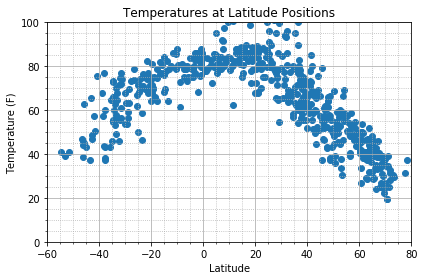

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/temp.png")

Latitude vs. Temperature Plot
This plot is looking at the relationship between latitude and temperature. You can see that as you aprroach the equator (latitude 0) the temperature gets hotter.

## Latitude vs. Humidity Plot


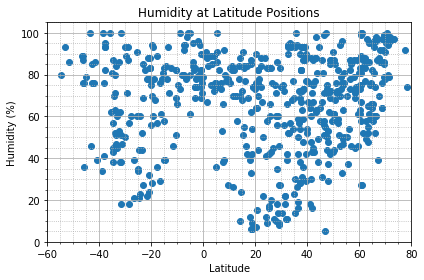

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/humidity.png")

Latitude vs. Humidity Plot
This plot is looking at the relationship between latitude and humidity. We can see that there is not much of a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

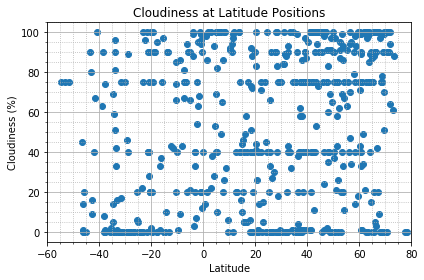

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/cloudiness.png")

Latitude vs. Cloudiness Plot
This plot is looking at the relationship between latitude and cloudiness. There doesn't not seem to be much of a correlation between latitude and cloudiness.¶

## Latitude vs. Wind Speed Plot

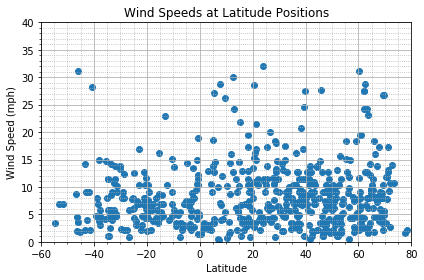

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/windspeed.png")

Latitude vs. Wind Speed Plot
This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get

In [15]:
# Creating Northern and Southern Hemisphere DataFrames
split = clean_city_data['Lat'] > 0
n_hemisphere = cities_df[split]
s_hemisphere = cities_df[~split]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

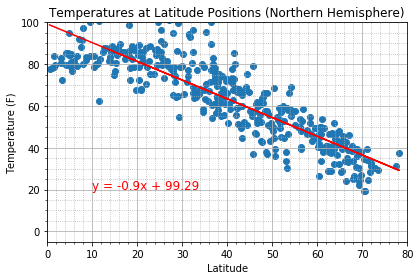

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Temperature"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_temp_regression.png")

Max Temp vs. Latitude Linear Regression

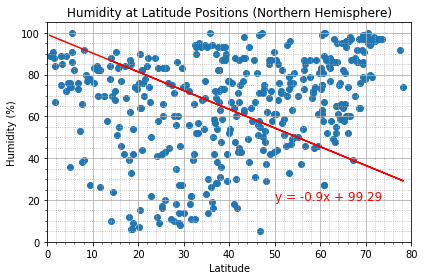

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Humidity"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_humid_regression.png")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

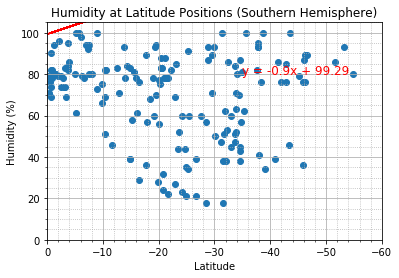

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_humid_regression.png")

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

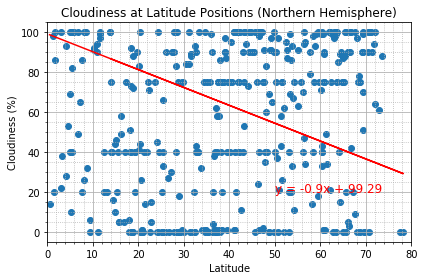

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_clouds_regression.png")

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

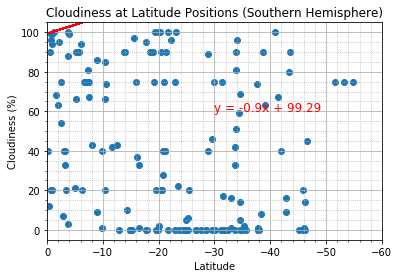

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_clouds_regression.png")

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

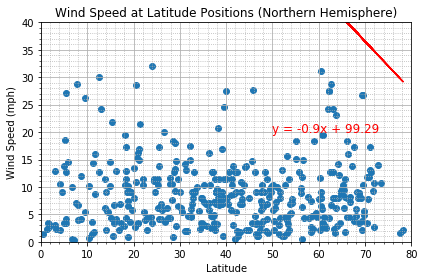

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_wind_regression.png")

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

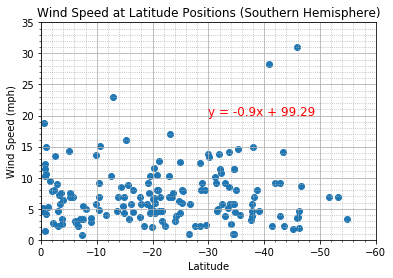

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")

Max Temp vs. Latitude Linear Regression
Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.


Humidity % vs. Latitude Linear Regression
There doesn't  seem to be a very strong correlation between humidity and latitude. However, there seems to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; in other words in the Northern Hemisphere as you get further away from the equator humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.


Cloudiness vs. Latitude Linear Regression
There does not seem to be much of a correlation between cloudiness and latitude. However, in the linear regression, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator the less cloudy it is.


Wind Speed vs. Latitude Linear Regression
There seems to be a strong correlation between wind sped and latitude when you look at the plots. However, the linear regresion shows a much lower correlation. There is still a correlation in both hemispheres, because the further you are from the equator the higher the wind speeds are, but the slope of the regression line is much shallower.